# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, we shall apply the regression analysis and diagnostics techniques covered in this section to a familiar "Boston Housing" dataset. We performed a detailed EDA for this dataset in earlier section and hence carry a good understanding of how this dataset is composed. This this lab we shall try to identify the predictive ability of some of features found in this dataset towards identifying house price. 

### Objectives:
You will be able to:
* Build many linear models with boston housing data set using OLS
* For each model, analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

Let's get started. 

### Import necessary libraries and load 'BostonHousing.csv' as pandas dataframe.

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



The data features and target are present as columns in boston data. Boston data gives a set of independent as independent variables in data and the housing rate as `MEDV` in target property. Also feature names are listed in feature_names. The desription is available at [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [2]:
# Your code here
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Record your observations here 
# #### crim
# per capita crime rate by town.
# #### zn
# proportion of residential land zoned for lots over 25,000 sq.ft.
# #### indus
# proportion of non-retail business acres per town.
# #### chas
# Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# #### nox
# nitrogen oxides concentration (parts per 10 million).
# #### rm
# average number of rooms per dwelling.
# #### age
# proportion of owner-occupied units built prior to 1940.
# #### dis
# weighted mean of distances to five Boston employment centres.
# #### rad
# index of accessibility to radial highways.
# #### tax
# full-value property-tax rate per $10,000.
# #### ptratio
# pupil-teacher ratio by town.
# #### black
# 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# #### lstat
# lower status of the population (percent).
# #### medv
# median value of owner-occupied homes in $10000s.


### Create histograms for all variables in the dataset and comment on their shape (uniform or not ?)

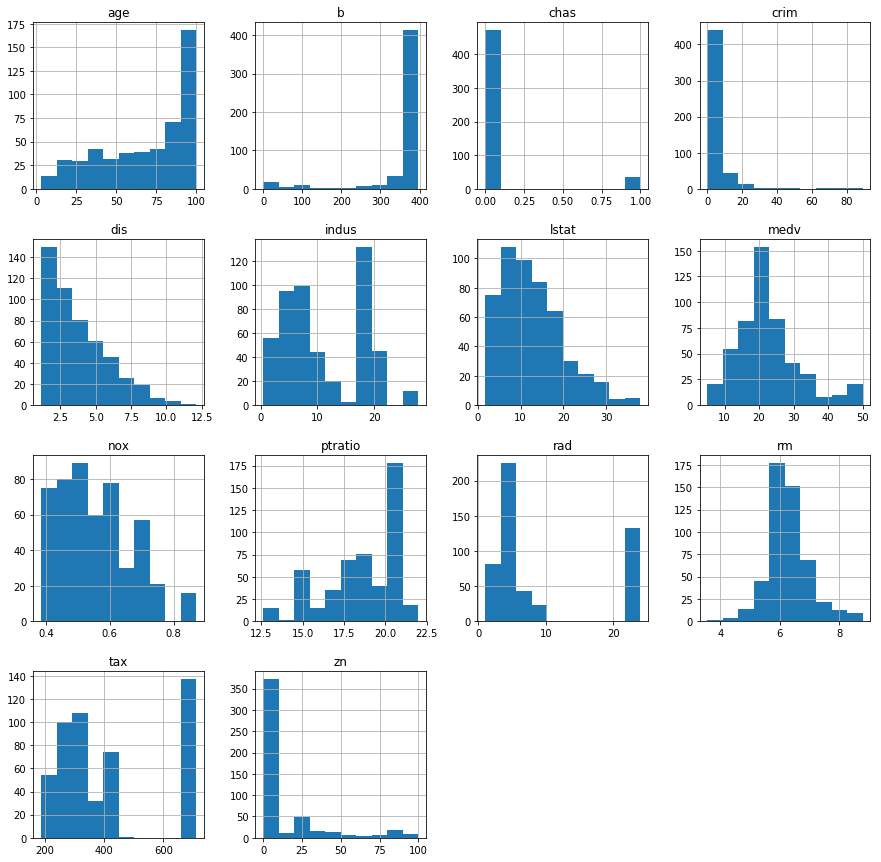

In [16]:
# Your code here 
_ = df.hist(figsize=(15, 15))

In [5]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [116]:
# You observations here 
#age : majority of houses appear to be older than 1940
#dis : average distance of 
#lstat:
#rm : avg # of rooms tends to be around 6

Based on this , we shall choose a selection of features which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [17]:
# Your code here
new_df = df[['crim', 'dis', 'rm', 'zn', 'age', 'medv']]

### Check for linearity assumption for all chosen features with target variable using scatter plots and comment on the results

In [30]:
df.index

RangeIndex(start=0, stop=506, step=1)

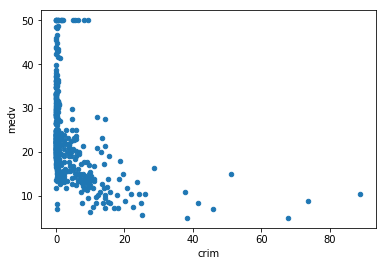

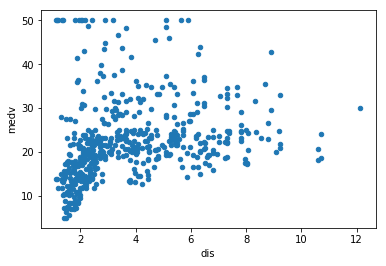

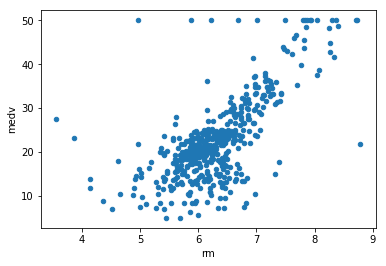

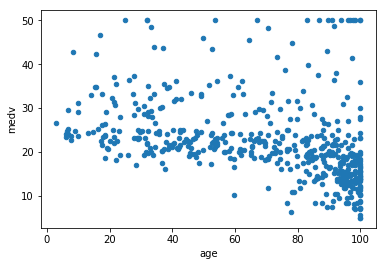

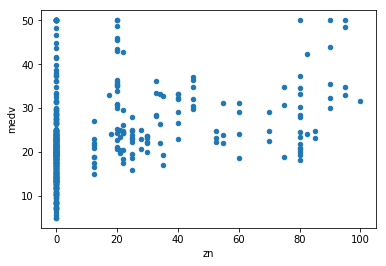

In [35]:
# Your code here 
_= new_df.plot.scatter(x='crim', y='medv')
_= new_df.plot.scatter(x='dis', y='medv')
_= new_df.plot.scatter(x='rm', y='medv')
_= new_df.plot.scatter(x='zn', y='medv')
_= new_df.plot.scatter(x='age', y='medv')


In [ ]:
# Your observations here 

Okie so obviously our data needs a lot of pre-procesing to improve the results. This key behind such kaggle competitions is to process the data in such a way that we can identify the relationships and make predictions in the best possible way. For now, we shall leave the dataset untouched and just move on with regression. So far, our assumptions, although not too strong, but still hold to a level that we can move on. 

### Let's do Regression 

Right here is the real deal. Let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). We shall do this is a loop and in every iteration, we shall pick one of the independent variables  perform following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`.
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

In [81]:
new_df.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


In [83]:
print(result.params)
result.summary()

Intercept    24.033106
crim         -0.415190
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.17e-19
Time:                        16:44:14   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.000      23.229      24.837
crim          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
for indi_vari in new_df.columns:
    print(indi_vari)

crim
dis
rm
zn
age
medv


Boston Housing Dataset - Regression Analysis and Diagnostics for formula: medv~crim


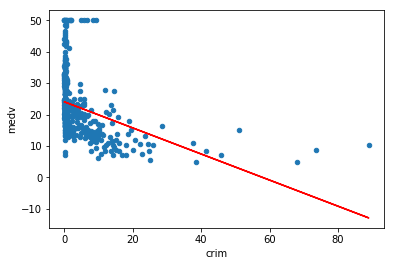

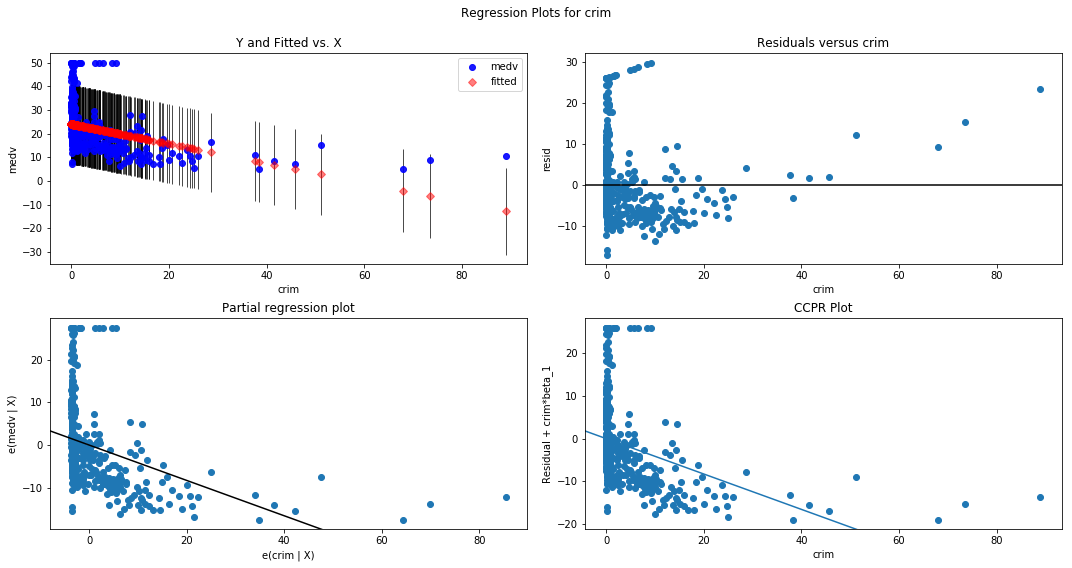

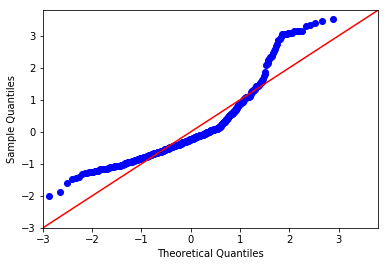

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.17e-19
Time:                        17:14:11   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.0

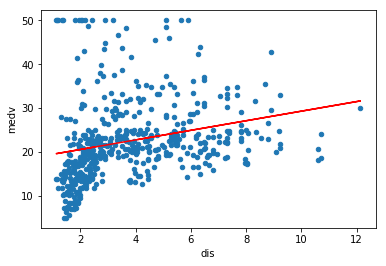

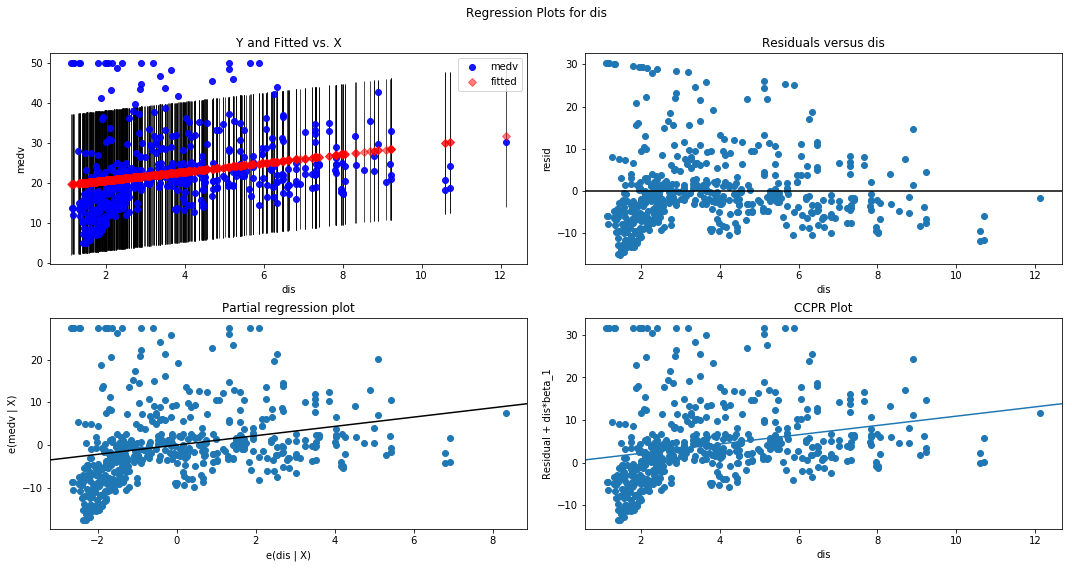

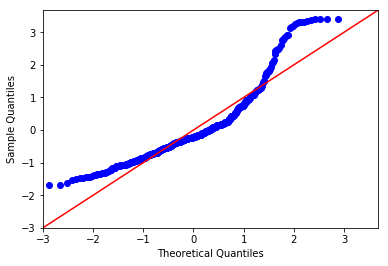

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.21e-08
Time:                        17:14:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

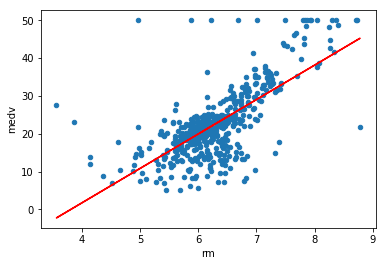

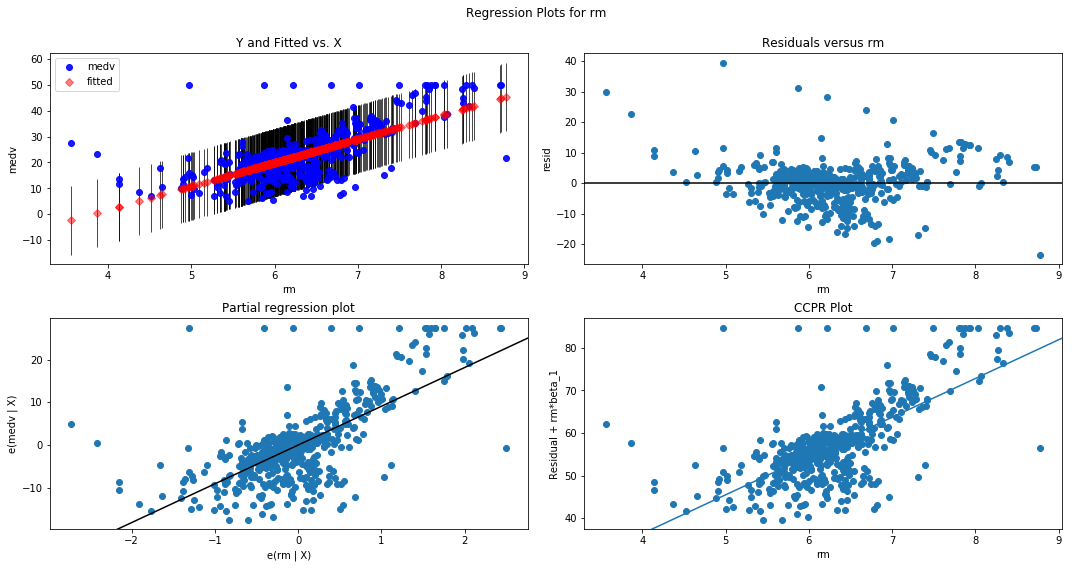

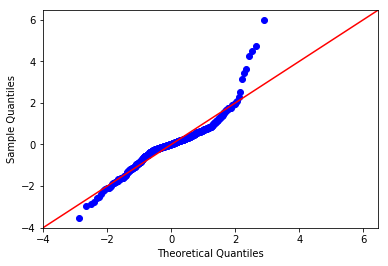

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        17:14:13   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

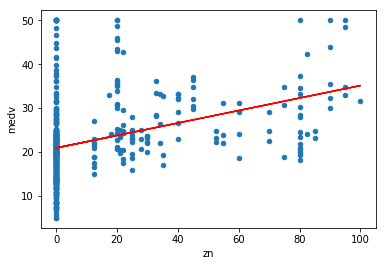

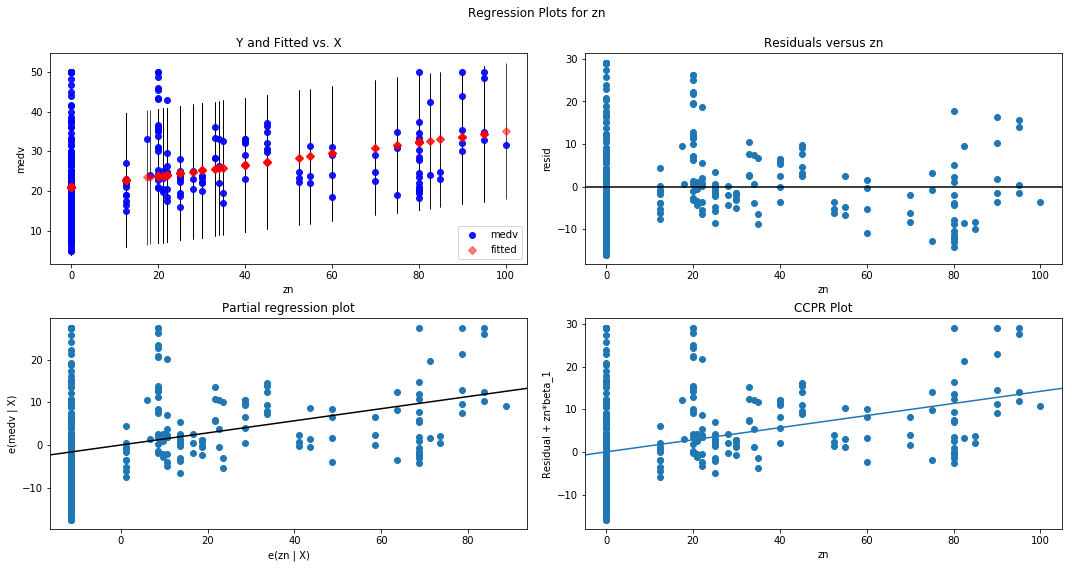

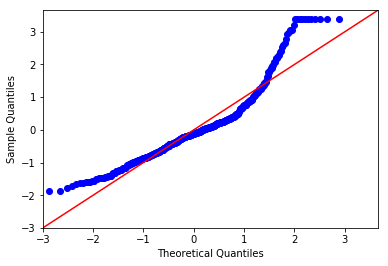

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     75.26
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           5.71e-17
Time:                        17:14:14   Log-Likelihood:                -1805.0
No. Observations:                 506   AIC:                             3614.
Df Residuals:                     504   BIC:                             3623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.9176      0.425     49.248      0.0

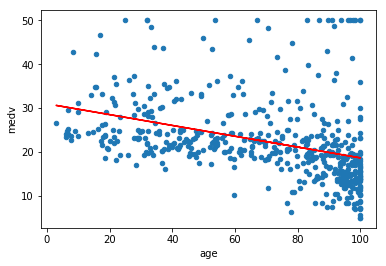

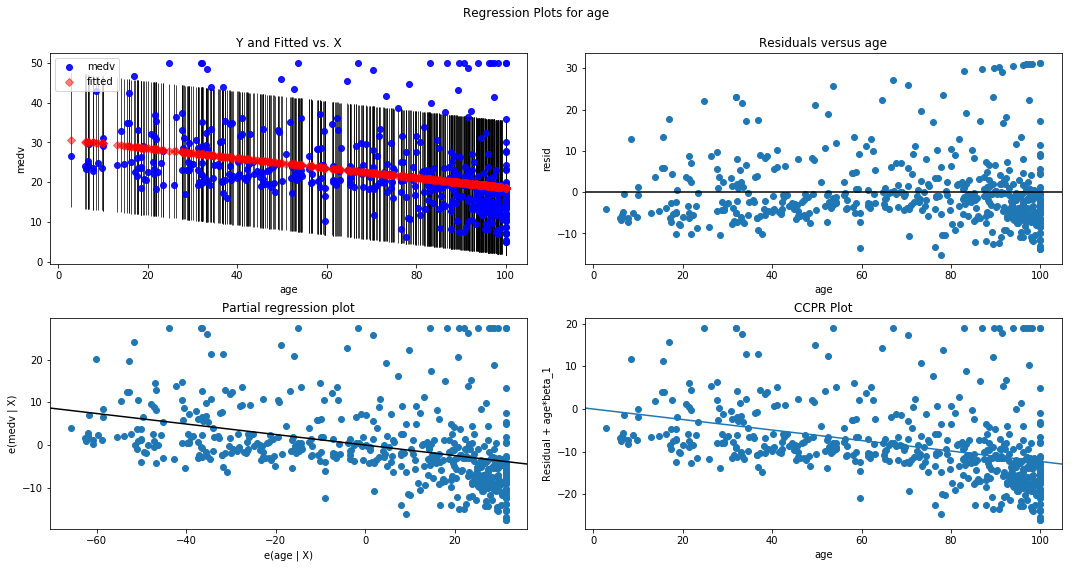

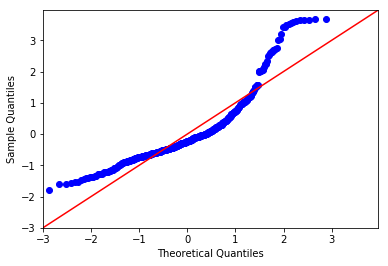

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.57e-18
Time:                        17:14:15   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.0

In [112]:
# Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

results = []

for indi_vari in new_df.columns:
    
    if indi_vari != 'medv':
        f= 'medv~' + indi_vari
        print("Boston Housing Dataset - Regression Analysis and Diagnostics for formula: " + f)
        result = ols(formula=f, data=new_df).fit()

        a = new_df.plot.scatter(x= indi_vari, y='medv')
        a.plot(new_df[indi_vari], result.params[0] + (result.params[1] * new_df[indi_vari]), 'r')

        fig = plt.figure(figsize=(15,8))
        fig = sm.graphics.plot_regress_exog(result, indi_vari, fig=fig)

        residuals = result.resid
        fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

        plt.show()
        print(result.summary())
        results.append({'ind_var': indi_vari, 'r_squared': result.rsquared, 'intercept': result.params[0], 'slope': result.params[1], 'p-value': result.pvalues[1],'normality (JB)': result.diagn['jb']})

In [111]:
result.pvalues

Intercept    1.341723e-227
crim          1.173987e-19
dtype: float64

In [113]:
pd.DataFrame(results)

,ind_var,intercept,normality (JB),p-value,r_squared,slope
0,crim,24.033106,295.403720,1.173987e-19,0.150780,-0.415190
1,dis,18.390088,305.104165,1.206612e-08,0.062464,1.091613
2,rm,-34.670621,612.448985,2.487229e-74,0.483525,9.102109
3,zn,20.917579,262.387500,5.713584e-17,0.129921,0.142140
4,age,30.978678,456.983434,1.569982e-18,0.142095,-0.123163


In [118]:
#Your obervations here 


So clearly the results are not highly reliable. the best good of fit i.e. r-squared is witnessed with `rm`. So clearly in this analysis this is our best predictor. 

---
#### So how can we improve upon these results . 
1. Pre-Processing 

This is where pre-processing of data comes in. Dealing with outliers, normalizing data, scaling values etc can help regression analysis get more meaningful results from the given set of data 

2. Advanced Analytical Methods

Simple regression is a very basic analysis techniques and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. In the next section we shall look at multiple regression where we can use multiple features **AT ONCE** to define a relationship with outcome. We shall also look at some pre-processing and data simplification techniques and re-visit the boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the the goodness of fit. 
![](https://i.pinimg.com/originals/e5/a5/1e/e5a51eff1b2133105ebaa9b779106ae2.png)

## Summary 

In this lab, we attempted to bring in all the skills learnt so far to a slighlt detailed dataset. We looked at the outcome of our analysis and realized that the data might need some pre-processing to see a clear improvement in results. We shall pick it up in the next section from this point and bring in data pre-processing techniques along with some assumptions that are needed for multiple regression . 